# Modelos

In [1]:
import numpy as np
import pandas as pd

In [2]:
datos = pd.read_csv('mct_paso_cb.csv')
prueba = pd.read_csv('mct_no_paso_cb.csv')
datos.head()

,id_anony,Cod.Car.Sec,Anho_in,Anho_out,tardoCB,PasoCB,recurso,recursadas_s1,Cant.Mat.Aprob,prom_al1,prom_c1,prom_dt,prom_f1,prom_ga,prom_gd,prom_1er_S
0,es_1756,MCT-PLS09,2012,2015,3,1,7,0,20,2.0,3.0,0.0,3.0,5.0,0.0,3.250000
1,es_1778,MCT-PLS09,2012,2016,4,1,8,0,20,1.5,3.0,0.0,2.0,4.0,0.0,2.625000
2,es_1815,MCT-PLS13,2013,2018,5,1,12,2,21,5.0,4.0,3.0,4.0,3.0,3.0,3.666667
3,es_1830,MCT-PLS13,2013,2015,2,1,1,0,20,4.0,2.0,3.0,4.0,5.0,5.0,3.833333
4,es_1841,MCT-PLS13,2013,2017,4,1,7,0,20,1.5,4.0,3.0,4.0,4.0,5.0,3.583333


* La correlación de Pearson funciona bien con variables cuantitativas que tienen una distribución normal o próxima a la normal. Es más sensible a los valores extremos que las otras dos alternativas.

* La correlación de Spearman se emplea con variables cuantitativas (continuas o discretas). En lugar de utilizar directamente el valor de cada variable, los datos son ordenados y reemplazados por su respectivo orden ranking. Es un método no paramétrico muy utilizado cuando no se satisface la condición de normalidad necesaria para aplicar la correlación de Pearson.

* La correlación de Kendall es otra alternativa no paramétrica que, al igual que la correlación de Spearman, utiliza la ordenación de las observaciones ranking. Es recomendable cuando se dispone de pocos datos y muchos de ellos ocupan la misma posición en el rango, es decir, cuando hay muchas ligaduras.

fuente(https://www.cienciadedatos.net/documentos/pystats05-correlacion-lineal-python.html)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

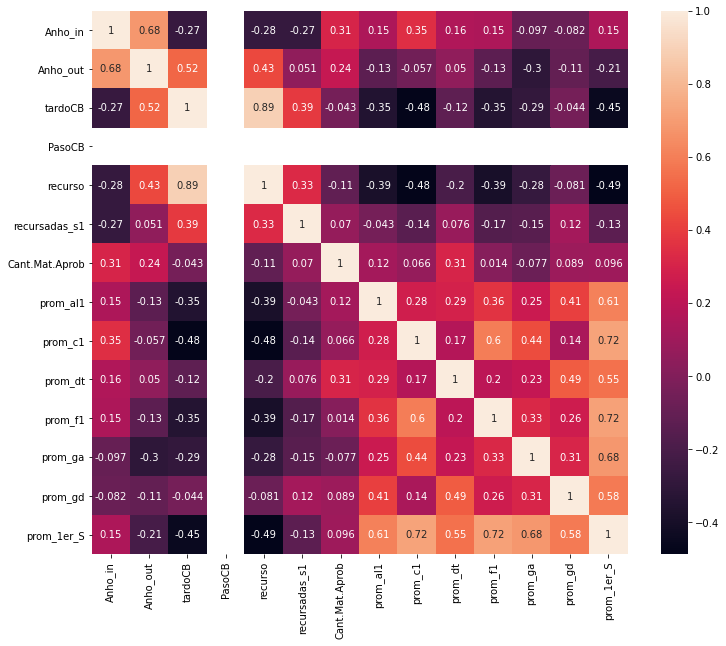

In [4]:
corr_df = datos.corr(method='pearson')

plt.figure(figsize=(12,10))
sns.heatmap(corr_df, annot=True)
plt.show()

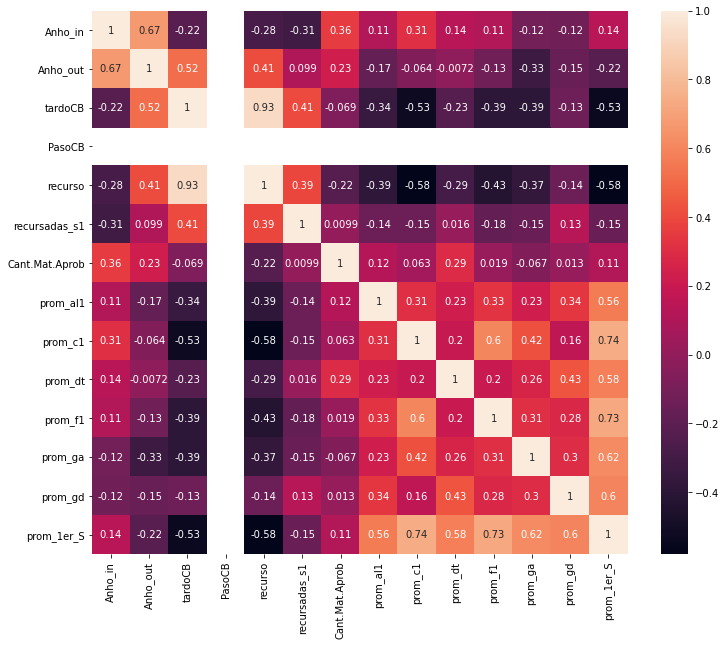

In [5]:
corr_df = datos.corr(method='spearman')

plt.figure(figsize=(12,10))
sns.heatmap(corr_df, annot=True)
plt.show()

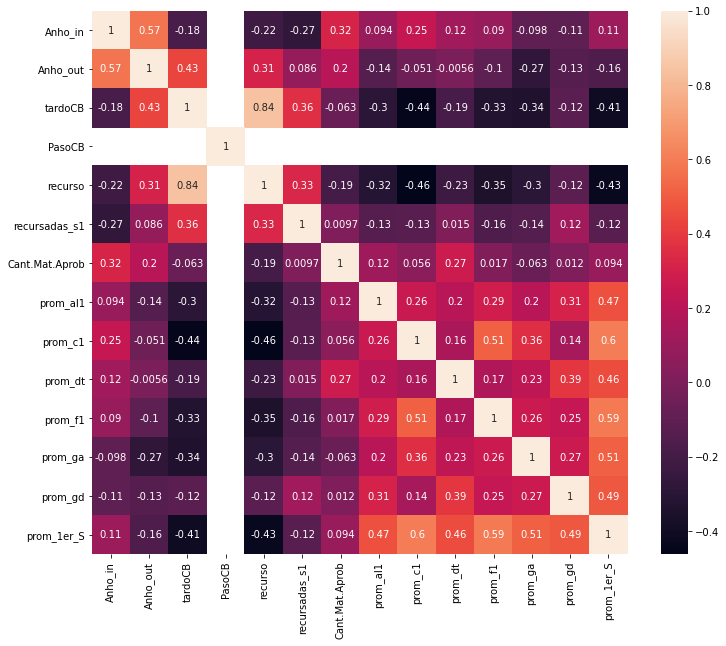

In [6]:
corr_df = datos.corr(method='kendall')

plt.figure(figsize=(12,10))
sns.heatmap(corr_df, annot=True)
plt.show()

In [7]:
datos.describe()

,Anho_in,Anho_out,tardoCB,PasoCB,recurso,recursadas_s1,Cant.Mat.Aprob,prom_al1,prom_c1,prom_dt,prom_f1,prom_ga,prom_gd,prom_1er_S
count,113.000000,113.000000,113.000000,113.0,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,2014.778761,2017.911504,3.132743,1.0,4.380531,0.194690,20.769912,4.294985,3.457227,4.008850,3.721239,4.297935,4.296460,4.022159
std,1.468323,1.655928,1.257154,0.0,5.392320,0.624763,0.422764,0.992284,1.295363,1.183937,1.099793,1.032327,1.119305,0.704613
min,2012.000000,2015.000000,2.000000,1.0,0.000000,0.000000,20.000000,1.333333,1.333333,0.000000,2.000000,1.333333,0.000000,2.250000
25%,2014.000000,2017.000000,2.000000,1.0,0.000000,0.000000,21.000000,4.000000,2.000000,3.000000,3.000000,4.000000,4.000000,3.500000
50%,2015.000000,2018.000000,3.000000,1.0,2.000000,0.000000,21.000000,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.083333
75%,2015.000000,2019.000000,4.000000,1.0,7.000000,0.000000,21.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.666667
max,2018.000000,2021.000000,7.000000,1.0,30.000000,4.000000,21.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [8]:
import statsmodels.formula.api as sm

In [9]:
model_1 = sm.ols(formula='tardoCB ~ recursadas_s1 + prom_c1 + prom_1er_S', data=datos).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tardoCB   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     19.77
Date:                Tue, 31 May 2022   Prob (F-statistic):           2.64e-10
Time:                        12:08:03   Log-Likelihood:                -161.15
No. Observations:                 113   AIC:                             330.3
Df Residuals:                     109   BIC:                             341.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.3853      0.604      8.914      0.000       4.188       6.583
recursadas_s1     0.6432      0.157      4.101      0.000       0.332       0.954
prom_c1          -0.2862      0.109     -2.636      0.010      -0.501      -0.071
prom_1er_S       -0.3452      0.199     -1.733      0.086      -0.740       0.050
==============================================================================
Omnibus:                       13.478   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.425
Skew:                           0.817   Prob(JB):                     0.000737
Kurtosis:                       3.625   Cond. No.                         36.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
model_2 = sm.ols(formula='tardoCB ~ prom_al1 + prom_c1 + prom_f1 + prom_ga + prom_1er_S + recursadas_s1', data=datos).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tardoCB   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     11.12
Date:                Tue, 31 May 2022   Prob (F-statistic):           1.36e-09
Time:                        12:08:14   Log-Likelihood:                -158.12
No. Observations:                 113   AIC:                             330.2
Df Residuals:                     106   BIC:                             349.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.5080      0.601      9.170      0.000       4.317       6.699
prom_al1         -0.3191      0.138     -2.318      0.022      -0.592      -0.046
prom_c1          -0.3729      0.115     -3.255      0.002      -0.600      -0.146
prom_f1           0.0041      0.137      0.030      0.976      -0.268       0.276
prom_ga          -0.0506      0.146     -0.346      0.730      -0.341       0.240
prom_1er_S        0.0896      0.392      0.229      0.819      -0.687       0.866
recursadas_s1     0.6485      0.157      4.135      0.000       0.338       0.959
==============================================================================
Omnibus:                       12.680   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.377
Skew:                           0.773   Prob(JB):                      0.00125
Kurtosis:                       3.671   Cond. No.                         60.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
model_3 = sm.ols(formula='tardoCB ~ prom_al1 + prom_c1 + prom_dt + prom_f1 + prom_ga + prom_gd + prom_1er_S + recursadas_s1',
                 data=datos).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tardoCB   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     8.469
Date:                Tue, 31 May 2022   Prob (F-statistic):           8.24e-09
Time:                        12:08:16   Log-Likelihood:                -157.35
No. Observations:                 113   AIC:                             332.7
Df Residuals:                     104   BIC:                             357.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.5764      0.622      8.964      0.000       4.343       6.810
prom_al1         -0.2945      0.175     -1.688      0.094      -0.641       0.052
prom_c1          -0.3033      0.182     -1.667      0.099      -0.664       0.057
prom_dt          -0.0286      0.155     -0.185      0.854      -0.336       0.279
prom_f1           0.0426      0.189      0.226      0.822      -0.332       0.417
prom_ga          -0.0054      0.213     -0.026      0.980      -0.427       0.416
prom_gd           0.1536      0.152      1.012      0.314      -0.147       0.455
prom_1er_S       -0.2313      0.906     -0.255      0.799      -2.027       1.564
recursadas_s1     0.6168      0.163      3.780      0.000       0.293       0.940
==============================================================================
Omnibus:                       11.169   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.419
Skew:                           0.727   Prob(JB):                      0.00331
Kurtosis:                       3.558   Cond. No.                         115.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
model_4 = sm.ols(formula='tardoCB ~ recurso + prom_1er_S + recursadas_s1 + prom_c1', data=datos).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tardoCB   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     115.1
Date:                Tue, 31 May 2022   Prob (F-statistic):           5.16e-38
Time:                        12:08:16   Log-Likelihood:                -91.889
No. Observations:                 113   AIC:                             193.8
Df Residuals:                     108   BIC:                             207.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.2778      0.381      5.977      0.000       1.522       3.033
recurso           0.1938      0.012     16.124      0.000       0.170       0.218
prom_1er_S        0.0709      0.111      0.636      0.526      -0.150       0.292
recursadas_s1     0.2099      0.089      2.345      0.021       0.033       0.387
prom_c1          -0.0926      0.060     -1.535      0.128      -0.212       0.027
==============================================================================
Omnibus:                       20.874   Durbin-Watson:                   1.761
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.328
Skew:                           0.941   Prob(JB):                     7.06e-07
Kurtosis:                       4.573   Cond. No.                         58.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
model_5 = sm.ols(formula='tardoCB ~ recurso + prom_1er_S + recursadas_s1', data=datos).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tardoCB   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     150.7
Date:                Tue, 31 May 2022   Prob (F-statistic):           1.23e-38
Time:                        12:08:17   Log-Likelihood:                -93.108
No. Observations:                 113   AIC:                             194.2
Df Residuals:                     109   BIC:                             205.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.3805      0.378      6.306      0.000       1.632       3.129
recurso           0.1975      0.012     16.662      0.000       0.174       0.221
prom_1er_S       -0.0382      0.086     -0.443      0.659      -0.209       0.133
recursadas_s1     0.2110      0.090      2.343      0.021       0.033       0.389
==============================================================================
Omnibus:                       21.493   Durbin-Watson:                   1.783
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.984
Skew:                           0.949   Prob(JB):                     3.08e-07
Kurtosis:                       4.664   Cond. No.                         54.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
print("modelo 1:\n",model_1.params,"\n")
print("modelo 2:\n",model_2.params,"\n")
print("modelo 3:\n",model_3.params,"\n")
print("modelo 4:\n",model_4.params,"\n")
print("modelo 5:\n",model_5.params,"\n")

modelo 1:
 Intercept        5.385258
recursadas_s1    0.643219
prom_c1         -0.286185
prom_1er_S      -0.345172
dtype: float64 

modelo 2:
 Intercept        5.507982
prom_al1        -0.319086
prom_c1         -0.372932
prom_f1          0.004125
prom_ga         -0.050611
prom_1er_S       0.089615
recursadas_s1    0.648528
dtype: float64 

modelo 3:
 Intercept        5.576419
prom_al1        -0.294547
prom_c1         -0.303349
prom_dt         -0.028639
prom_f1          0.042622
prom_ga         -0.005427
prom_gd          0.153611
prom_1er_S      -0.231316
recursadas_s1    0.616783
dtype: float64 

modelo 4:
 Intercept        2.277770
recurso          0.193785
prom_1er_S       0.070906
recursadas_s1    0.209910
prom_c1         -0.092551
dtype: float64 

modelo 5:
 Intercept        2.380523
recurso          0.197459
prom_1er_S      -0.038247
recursadas_s1    0.211001
dtype: float64 



In [15]:
y_pred_1 = {}
for i in range(1,6):
    if i==1: y_pred_1[f"model_{i}"] = model_1.fittedvalues
    if i==2: y_pred_1[f"model_{i}"] = model_2.fittedvalues
    if i==3: y_pred_1[f"model_{i}"] = model_3.fittedvalues
    if i==4: y_pred_1[f"model_{i}"] = model_4.fittedvalues
    if i==5: y_pred_1[f"model_{i}"] = model_5.fittedvalues


In [16]:
y_pred = {}
for i in range(1,6):
    if i==1: y_pred[f"model_{i}"] = [model_1.mse_resid, model_1.rsquared]
    if i==2: y_pred[f"model_{i}"] = [model_2.mse_resid, model_2.rsquared]
    if i==3: y_pred[f"model_{i}"] = [model_3.mse_resid, model_3.rsquared]
    if i==4: y_pred[f"model_{i}"] = [model_4.mse_resid, model_4.rsquared]
    if i==5: y_pred[f"model_{i}"] = [model_5.mse_resid, model_5.rsquared]

In [17]:
from sklearn import metrics
for i in range(1,6):
    y_pred[f"model_{i}"].append(metrics.mean_absolute_error(datos['tardoCB'], y_pred_1[f"model_{i}"]))
    y_pred[f"model_{i}"].append(metrics.mean_squared_error(datos['tardoCB'], y_pred_1[f"model_{i}"]))
    y_pred[f"model_{i}"].append(np.sqrt(metrics.mean_squared_error(datos['tardoCB'], y_pred_1[f"model_{i}"])))

In [18]:
score = pd.DataFrame({'model_1':y_pred["model_1"], 'model_2':y_pred["model_2"] , 'model_3':y_pred["model_3"],
                     'model_4':y_pred["model_4"], 'model_5':y_pred["model_5"]},
                     index=['mse_resid', 'rsquared', 'MAE', 'MSE', 'RMSE'])
score

,model_1,model_2,model_3,model_4,model_5
mse_resid,1.051716,1.024917,1.030598,0.311525,0.315402
rsquared,0.352365,0.386239,0.394481,0.809926,0.805779
MAE,0.778245,0.758548,0.753253,0.418425,0.424058
MSE,1.014487,0.961427,0.948515,0.297741,0.304238
RMSE,1.007218,0.980524,0.973917,0.545656,0.551577


In [43]:
#grafica
X = datos[['Anho_in', 'Anho_out']].values.reshape(-1,2)
Y = datos['tardoCB'].values
x = X[:, 0]
y = X[:, 1]
z = Y

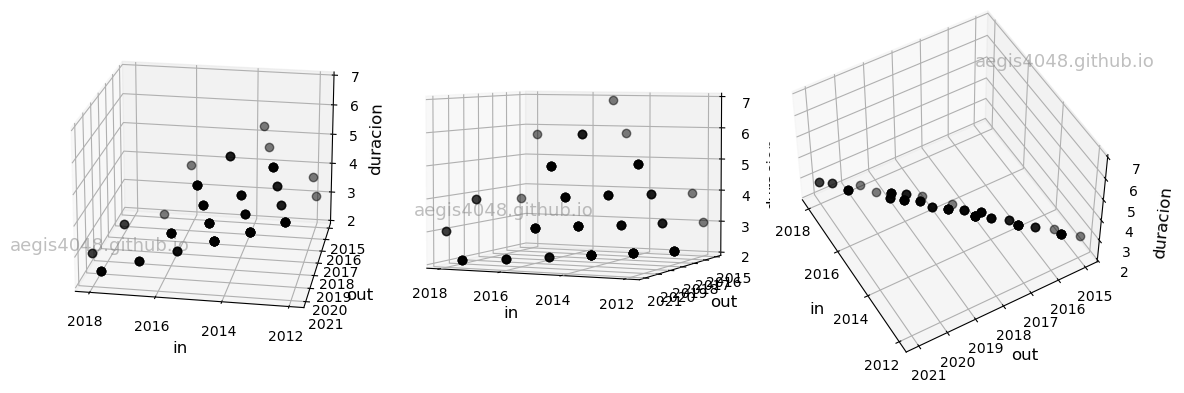

In [47]:
plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.set_xlabel('in', fontsize=12)
    ax.set_ylabel('out', fontsize=12)
    ax.set_zlabel('duracion', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=20, azim=100)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=50, azim=150)

fig.tight_layout()